In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [16]:
df.describe()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [17]:
df.isnull().sum()

No                                        0
X1_transaction_date                       0
X2_house_age                              0
X3_distance_to_the_nearest_MRT_station    0
X4_number_of_convenience_stores           0
X5_latitude                               0
X6_longitude                              0
Y_house_price_of_unit_area                0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8516\2153375046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price.head(),  y=price.head().index, palette='Blues')


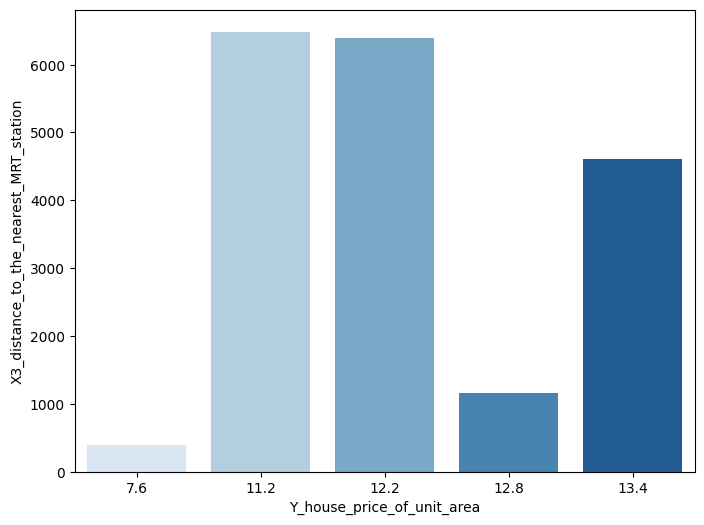

In [18]:
price =df['Y_house_price_of_unit_area'].groupby(df['X3_distance_to_the_nearest_MRT_station']).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=price.head(),  y=price.head().index, palette='Blues')

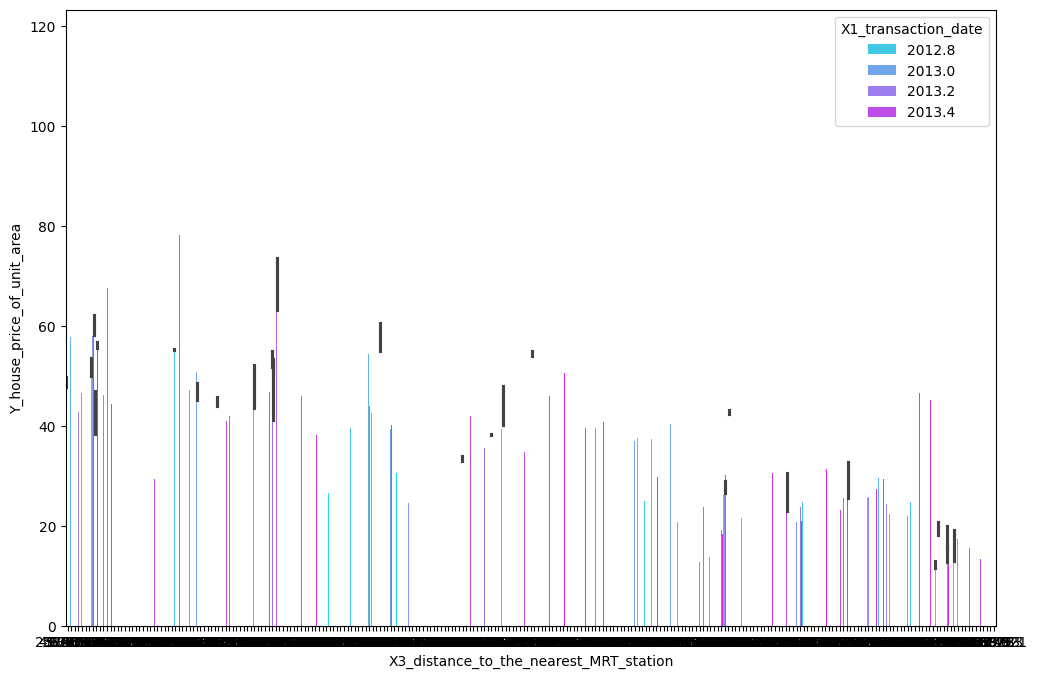

In [21]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X3_distance_to_the_nearest_MRT_station', y='Y_house_price_of_unit_area', hue='X1_transaction_date', 
data=df, palette='cool')

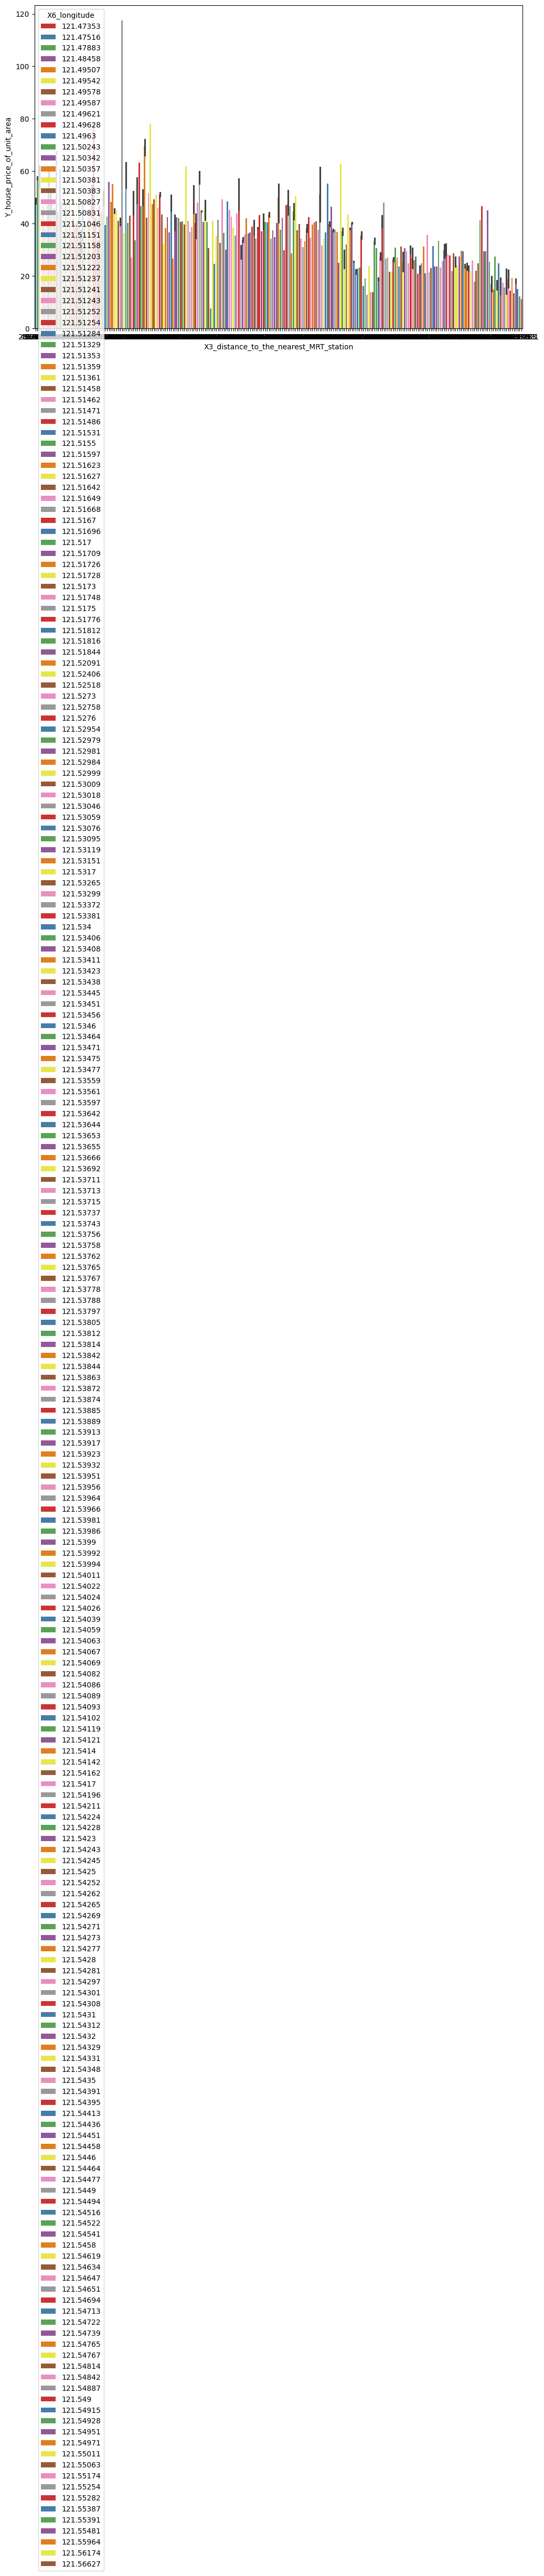

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X3_distance_to_the_nearest_MRT_station', y='Y_house_price_of_unit_area', hue='X6_longitude', 
data=df, palette='Set1')

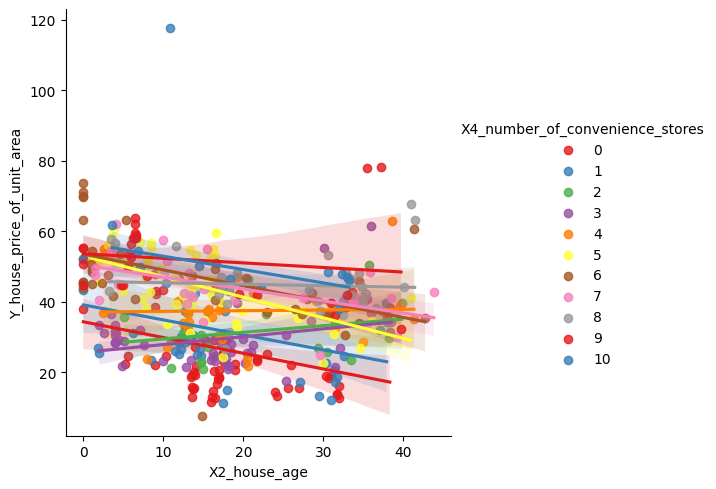

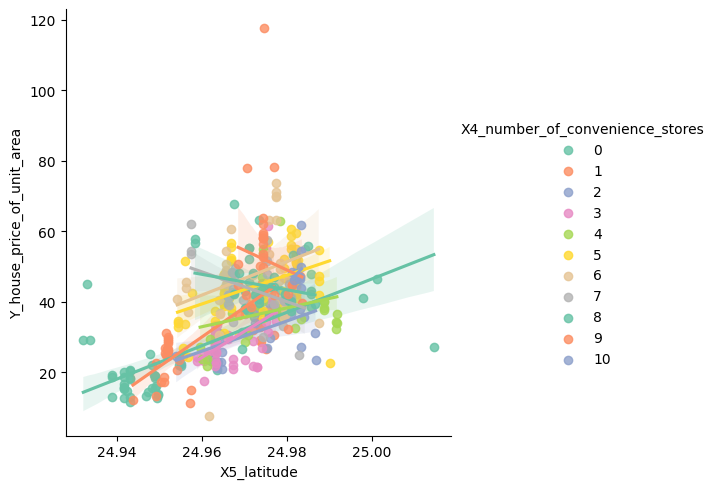

In [23]:
ax = sns.lmplot(x='X2_house_age', y='Y_house_price_of_unit_area', hue='X4_number_of_convenience_stores', 
                data=df, palette='Set1')
ax = sns.lmplot(x='X5_latitude', y='Y_house_price_of_unit_area', hue='X4_number_of_convenience_stores', 
                data=df, palette='Set2')

In [24]:
df[['X1_transaction_date', 'X4_number_of_convenience_stores', 'X3_distance_to_the_nearest_MRT_station']] = df[['X1_transaction_date', 'X4_number_of_convenience_stores', 'X3_distance_to_the_nearest_MRT_station']].astype('category')

In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.X1_transaction_date.drop_duplicates())
df.X1_transaction_date = label.transform(df.X1_transaction_date)
label.fit(df.X4_number_of_convenience_stores.drop_duplicates())
df.X4_number_of_convenience_stores = label.transform(df.X4_number_of_convenience_stores)
label.fit(df.X3_distance_to_the_nearest_MRT_station.drop_duplicates())
df.X3_distance_to_the_nearest_MRT_station = label.transform(df.X3_distance_to_the_nearest_MRT_station)

In [26]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
x = df.drop(['X3_distance_to_the_nearest_MRT_station'], axis = 1)
y = df['X3_distance_to_the_nearest_MRT_station']
x_train, x_test, y_train, y_test = holdout(x,y,test_size=0.2, random_state=0)

In [28]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = linear_reg.predict(x_test)

In [30]:
x

,No,X1_transaction_date,X2_house_age,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,1,3,32.0,10,24.98298,121.54024,37.9
1,2,3,19.5,9,24.98034,121.53951,42.2
2,3,11,13.3,5,24.98746,121.54391,47.3
3,4,10,13.3,5,24.98746,121.54391,54.8
4,5,2,5.0,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,4,13.7,0,24.94155,121.50381,15.4
410,411,0,5.6,9,24.97433,121.54310,50.0
411,412,7,18.8,7,24.97923,121.53986,40.6
412,413,4,8.1,5,24.96674,121.54067,52.5


In [31]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 : {0:.3f}'.format(R2))
print('RMSE : {0:.3f}'.format(rmse))

R2 : 0.699
RMSE : 40.253


In [32]:
importance = linear_reg.coef_
variables = ['NO','X1_transaction_date','X2_house_age','X3_distance_to_the_nearest_MRT_station','X4_number_of_convenience_stores','X5_latitude','X6_longitude','Y_house_price_of_unit_area']
for i, v in zip(variables, importance):
    print('Feature: %s, Score %.5f' % (i,v))

Feature: NO, Score -0.02066
Feature: X1_transaction_date, Score 2.86836
Feature: X2_house_age, Score -0.19957
Feature: X3_distance_to_the_nearest_MRT_station, Score -9.51299
Feature: X4_number_of_convenience_stores, Score 429.91421
Feature: X5_latitude, Score -1298.02853
Feature: X6_longitude, Score -2.50730


In [33]:
df.head()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,1,3,32.0,5,10,24.98298,121.54024,37.9
1,2,3,19.5,59,9,24.98034,121.53951,42.2
2,3,11,13.3,134,5,24.98746,121.54391,47.3
3,4,10,13.3,134,5,24.98746,121.54391,54.8
4,5,2,5.0,90,5,24.97937,121.54245,43.1


In [35]:
df = df.drop(colomns=['X3_distance_to_the_nearest_MRT_station'])
df.head()

TypeError: DataFrame.drop() got an unexpected keyword argument 'colomns'